In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy as sp
import six
from matplotlib.pyplot import *

(20, 61)
last 0.636635112441 threshold 0.6369


(0.63, 0.64)

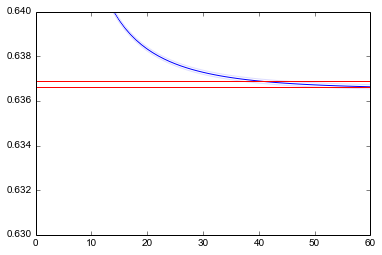

In [10]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2.
Trying to find an epoch to stop training when the loss has converged enough
'''
data11 = np.load('experiments/test2_model2_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.6369
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,60],[x_end,x_end],color='#ff0000')
plot([0,60],[x_thres,x_thres],color='#ff0000')

#xlim(30,40)
ylim(0.63,0.64)

# looks like epoch 40 for 3 significant digits

(20, 61)
last 0.621537292945 threshold 0.6219


(0.62, 0.63)

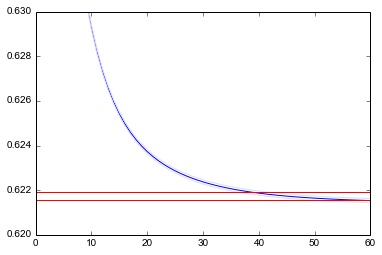

In [17]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2. Simpler model.
Trying to find an epoch to stop training when the loss has converged enough
'''
data11 = np.load('experiments/test2_model2simple_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.6219
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,60],[x_end,x_end],color='#ff0000')
plot([0,60],[x_thres,x_thres],color='#ff0000')

#xlim(30,40)
ylim(0.62,0.63)

# looks like epoch 40 for 3 significant digits

(20, 61)
last 0.621395924532 threshold 0.6219


(0.62, 0.63)

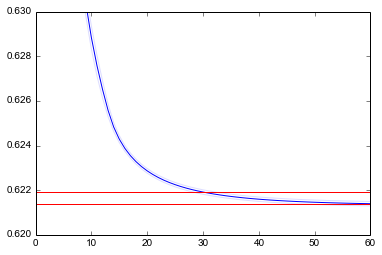

In [18]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2. Simpler model.
Trying to find an epoch to stop training when the loss has converged enough
'''
data11 = np.load('experiments/test2_model2gru_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')

vloss = data11['vloss']
#scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_(vloss.shape)
figure()
x_avg = np.mean(vloss,axis=0)
x_serr = np.std(vloss,axis=0) / vloss.shape[0] * 1.98
plot(x_avg, color='#0000ff')
plot(x_avg + x_serr, color='#ddddff')
plot(x_avg - x_serr, color='#ddddff')

x_end = np.mean(x_avg[-2:])
x_thres = 0.6219
six.print_('last {} threshold {}'.format(x_end, x_thres))
plot([0,60],[x_end,x_end],color='#ff0000')
plot([0,60],[x_thres,x_thres],color='#ff0000')

#xlim(30,40)
ylim(0.62,0.63)

# looks like epoch 30 for 3 significant digits, but might as well also do 40 like the other two

vloss shape (50, 41)
[[ 0.67407734  0.66894965  0.66343291 ...,  0.6365536   0.63652802
   0.6365045 ]
 [ 0.67436367  0.67085226  0.66578435 ...,  0.63603909  0.63599071
   0.63594544]
 [ 0.67316109  0.66793626  0.66199043 ...,  0.63624413  0.63621942
   0.63619648]
 ..., 
 [ 0.67376198  0.66887597  0.6628058  ...,  0.63614569  0.63611762
   0.63609161]
 [ 0.67392006  0.66944854  0.66446097 ...,  0.6367788   0.63675328
   0.6367298 ]
 [ 0.67392599  0.67044951  0.66568042 ...,  0.63619179  0.63616461
   0.6361396 ]]
scores shape (50,)
[ 1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


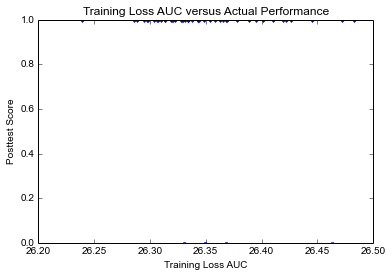

In [2]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2.
Looking at how many good models there are and the correlation between good and training loss.
'''
data11 = np.load('experiments/test2_model2_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')
data21 = np.load('experiments/test2_model2_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/mcts-rtype2-rollouts1000-trajectories100-real1-runBinCE-A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')

vloss shape (50, 41)
[[ 0.66700402  0.66126542  0.65437583 ...,  0.62300508  0.62296323
   0.62292442]
 [ 0.66624928  0.66060119  0.65471595 ...,  0.62232728  0.62229263
   0.62226048]
 [ 0.66670695  0.66104252  0.65410985 ...,  0.62262051  0.62258415
   0.6225506 ]
 ..., 
 [ 0.6673677   0.66197756  0.6548337  ...,  0.62298346  0.62294698
   0.6229134 ]
 [ 0.6650513   0.65889188  0.65234705 ...,  0.62163594  0.62160195
   0.62157054]
 [ 0.66468184  0.65906393  0.65269753 ...,  0.62107692  0.62104259
   0.62101103]]
scores shape (50,)
[ 0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.]


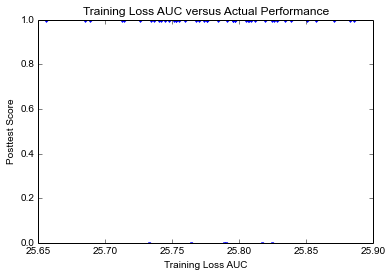

In [3]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2. Simple model.
Looking at how many good models there are and the correlation between good and training loss.
'''
data11 = np.load('experiments/test2_model2simple_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')
data21 = np.load('experiments/test2_model2simple_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/mcts-rtype2-rollouts1000-trajectories100-real1-runBinCE-A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')

vloss shape (50, 41)
[[ 0.68070579  0.67257297  0.66053288 ...,  0.61944172  0.61942222
   0.61940429]
 [ 0.67973758  0.67140121  0.65936619 ...,  0.62112499  0.62110046
   0.62107779]
 [ 0.6812563   0.67503448  0.66561952 ...,  0.62021855  0.62019815
   0.62017929]
 ..., 
 [ 0.68376007  0.67952596  0.6708486  ...,  0.62358532  0.6235608
   0.62353831]
 [ 0.68218984  0.67619533  0.6661753  ...,  0.62239964  0.62236932
   0.62234169]
 [ 0.68251205  0.67672956  0.66678548 ...,  0.62304584  0.62302122
   0.6229983 ]]
scores shape (50,)
[ 0.02083333  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.          0.
  0.          0.1875      0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.          0.

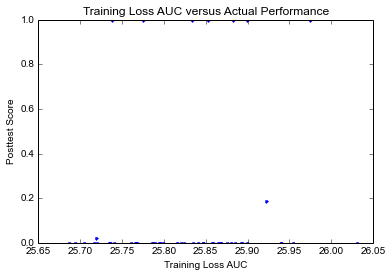

In [4]:
'''
Analyzing results of student2 with 2 skills, with training length 2 and testing length 2. GRU
Looking at how many good models there are and the correlation between good and training loss.
'''
data11 = np.load('experiments/test2_model2gru_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/stats-runBinCE-A.npz')
data21 = np.load('experiments/test2_model2gru_tiny-dropout10-shuffle0-data-test2-n10000-l2-random.pickle/mcts-rtype2-rollouts1000-trajectories100-real1-runBinCE-A.npz')

vloss = data11['vloss']
scores = data21['scores'][:,0]
#initialq = data51['qvals'][:,0]
#opts = data61['opts']
#qfuncs = data61['qs'][:,0,:,:]

six.print_('vloss shape {}'.format(vloss.shape))
six.print_(vloss)
six.print_('scores shape {}'.format(scores.shape))
six.print_(scores)

xs = np.sum(vloss,axis=1)
ys = scores
title('Training Loss AUC versus Actual Performance')
xlabel('Training Loss AUC')
ylabel('Posttest Score')
plot(xs,ys,'.')